### Dataframe de ejemplo para gráfica de barras horizontales

In [3]:
from pathlib import Path
import pandas as pd

# Ruta relativa para el archivo Excel
input_dir = Path("input")
archivo_excel = input_dir / "HDs2025 (07-04-2025).xlsx"

xls = pd.ExcelFile(archivo_excel)
df = xls.parse("PLANTILLA")

# Ajustar encabezados
df.columns = df.iloc[0]
df = df[1:]

df['NUMERO DE VICTIMAS'] = pd.to_numeric(df['NUMERO DE VICTIMAS'], errors='coerce')
victimas_por_entidad = df.groupby('ENTIDAD FEDERATIVA')['NUMERO DE VICTIMAS'].sum().sort_values(ascending=False)
victimas_por_entidad

ENTIDAD FEDERATIVA
GUANAJUATO                         869
ESTADO DE MEXICO                   485
BAJA CALIFORNIA                    432
SINALOA                            407
CHIHUAHUA                          385
MICHOACAN DE OCAMPO                379
SONORA                             342
JALISCO                            308
MORELOS                            283
TABASCO                            272
NUEVO LEON                         258
GUERRERO                           239
CIUDAD DE MEXICO                   224
VERACRUZ DE IGNACIO DE LA LLAVE    220
PUEBLA                             175
OAXACA                             168
QUINTANA ROO                       119
CHIAPAS                            114
COLIMA                             111
SAN LUIS POTOSI                     91
TAMAULIPAS                          77
ZACATECAS                           69
HIDALGO                             60
NAYARIT                             46
TLAXCALA                            32
CAMPEC

### **Código a copiar para gráfica de barras horizontales:**

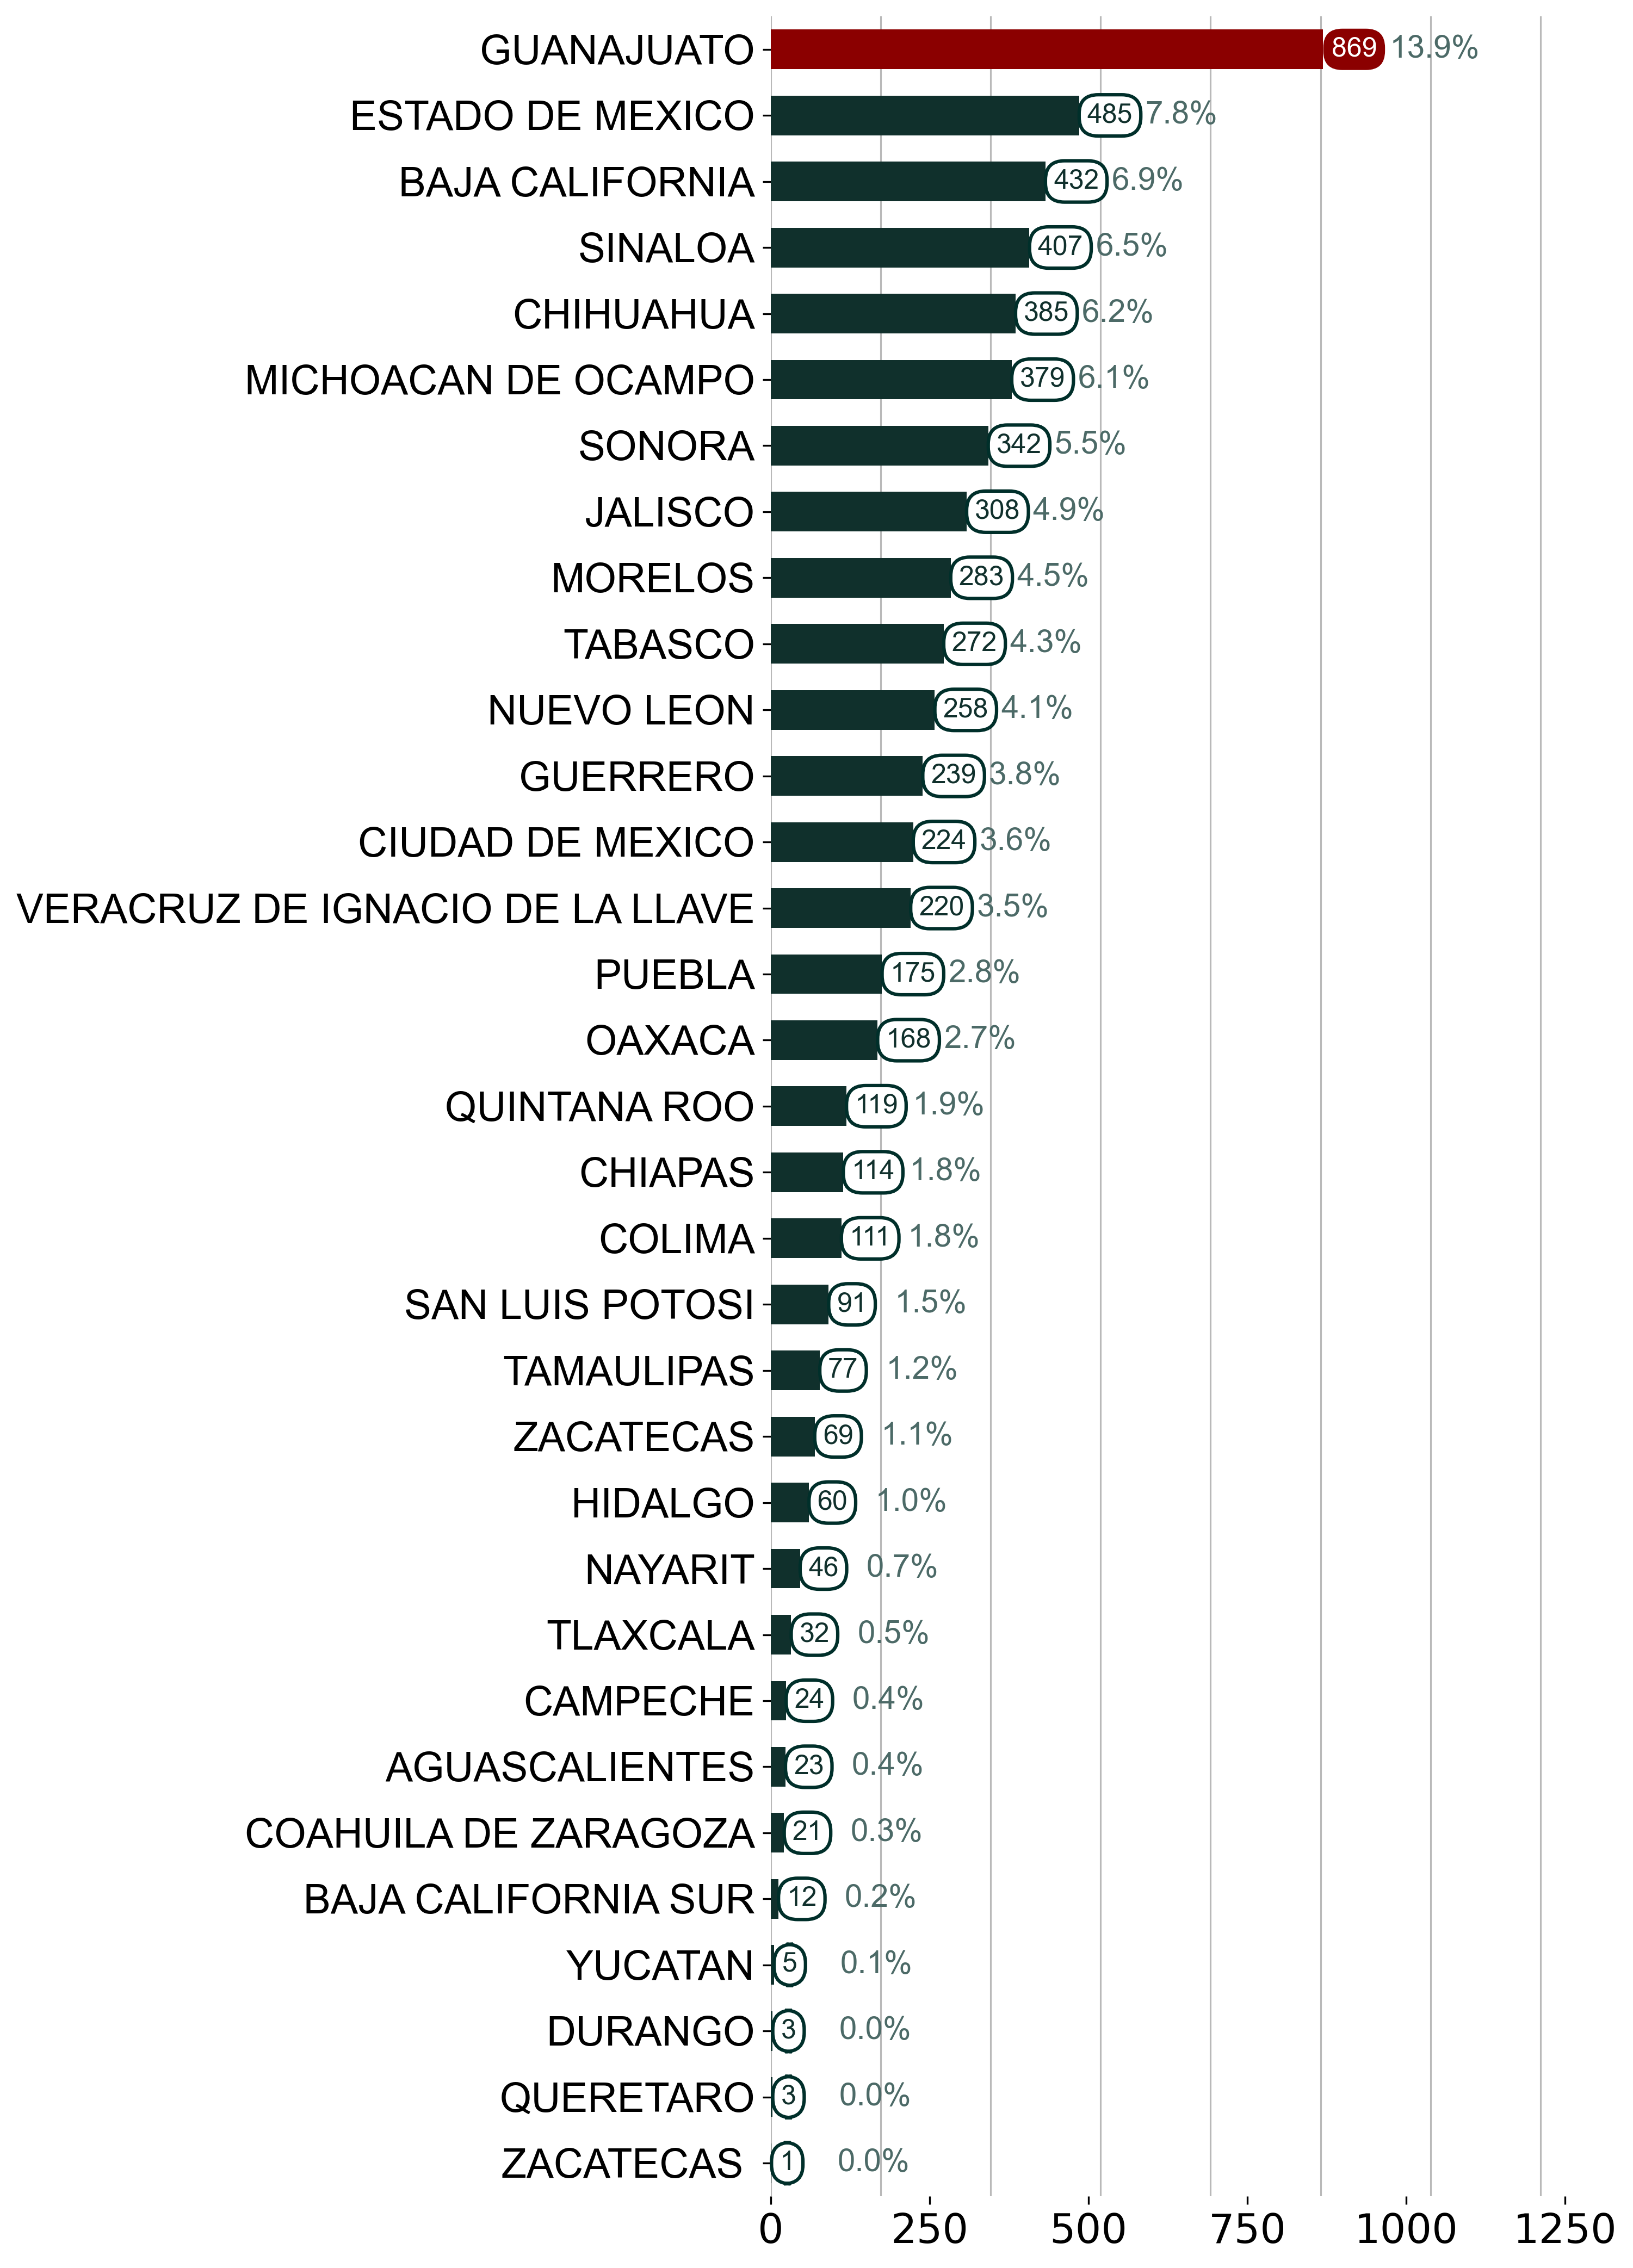

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from pathlib import Path

# VARIABLES A CAMBIAR:
dataframe_a_graficar = victimas_por_entidad

# Configurar las fuentes SVG como texto editable
plt.rcParams['svg.fonttype'] = 'none'

# Ruta relativa para las fuentes
font_dirs = [Path("fonts/arial")]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# Crear una instancia de FontProperties para Arial
arial_font = font_manager.FontProperties(fname=str(font_files[0]))


def calcular_intervalo(max_valor):
    """Calcula un intervalo adecuado para el eje Y basado en el valor máximo"""
    potencia = 10 ** (int(np.log10(max_valor)) - 1)
    intervalo = round(max_valor / 5 / potencia) * potencia

    # Asegurar que el intervalo no sea muy pequeño o grande
    if max_valor / intervalo > 8:
        intervalo *= 2
    elif max_valor / intervalo < 4:
        intervalo /= 2

    return max(intervalo, 1)  # Mínimo intervalo de 1

def barras_horizontales(victimas_por_entidad, bar_height=0.6):
    font_config = {
        'family': 'Arial',  # Cambiar a Arial
        'titulo': {'size': 36, 'weight': 'medium', 'color': '#000000'},
        'eje_y': {'size': 18, 'weight': 'medium', 'color': '#000000'},
        'eje_x': {'size': 18, 'weight': 'medium', 'color': '#000000'},
        'etiquetas_eje_y': {'size': 24, 'weight': 'medium', 'color': '#767676'},
        'etiquetas_eje_x': {'size': 24, 'weight': 'semibold', 'color': '#767676'},
        'capsula_valor': {'size': 12, 'weight': 'medium', 'color': '#10302C'},
        'capsula_max': {'size': 32, 'weight': 'medium', 'color': 'white'},
        'porcentaje': {'size': 14, 'weight': 'medium', 'color': '#4C6A67'},
        'leyenda': {'size': 20, 'weight': 'medium', 'color': '#767676'}  # Nueva categoría para la leyenda
    }

    # Ordenar de mayor a menor 
    sorted_items = sorted(victimas_por_entidad.items(), key=lambda x: x[1], reverse=True)
    entidades = [item[0] for item in sorted_items]
    valores = [item[1] for item in sorted_items]
    max_valor = max(valores)
    total = sum(valores)

   
    y_positions = np.arange(len(entidades)) 

    
    fig, ax = plt.subplots(figsize=(10, 14), dpi=300)
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    x_max = max_valor * 1.5
    x_interval = max_valor // 5 or 1

    # Líneas verticales
    x_ticks = np.arange(0, x_max + x_interval, x_interval)
    for x in x_ticks:
        lw = 2 if x == max_valor else 0.75
        lc = 'black' if x == max_valor else '#B9B9B9'
        ax.axvline(x, color=lc, linewidth=lw)

    # Dibujar barras
    for y_pos, entidad, valor in zip(y_positions, entidades, valores):
        porcentaje = round((valor / total) * 100, 1)

        if valor == max_valor:
            for alpha in np.linspace(0.3, 1, 10):
                ax.barh(y_pos, valor, height=bar_height,
                        color='#8B0000', alpha=alpha, edgecolor='none', zorder=2)
            bbox_color = '#8B0000'
            text_color = font_config['capsula_max']['color']
            edge_col = 'none'
            lw = 0
        else:
            for alpha in np.linspace(0.1, 0.8, 10):
                ax.barh(y_pos, valor, height=bar_height,
                        color='#10302C', alpha=alpha, edgecolor='none', zorder=2)
            bbox_color = 'white'
            text_color = font_config['capsula_valor']['color']
            edge_col = '#002F2A'
            lw = 1.5

        # Cápsula con valor
        ax.text(valor + x_max * 0.01, y_pos, f"{valor:,}",
                va='center', ha='left',
                fontsize=font_config['capsula_valor']['size'],
                fontfamily=font_config['family'],
                fontweight=font_config['capsula_valor']['weight'],
                color=text_color,
                bbox=dict(boxstyle="round,pad=0.3,rounding_size=0.7",
                          facecolor=bbox_color,
                          edgecolor=edge_col,
                          linewidth=lw))

        # Porcentaje
        ax.text(valor + x_max * 0.08, y_pos, f"{porcentaje}%",
                va='center', ha='left',
                fontsize=font_config['porcentaje']['size'],
                fontfamily=font_config['family'],
                fontweight=font_config['porcentaje']['weight'],
                color=font_config['porcentaje']['color'])

    # Eje Y (etiquetas)
    ax.set_yticks(y_positions)
    ax.set_yticklabels(entidades,
                       fontsize=font_config['eje_y']['size'],
                       fontfamily=font_config['family'],
                       fontweight=font_config['eje_y']['weight'])

    ax.set_xlim(0, x_max)
    ax.set_ylim(len(entidades) - 0.5, -0.5)

    # Limpiar bordes
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(
        axis='x',
        labelsize=font_config['eje_x']['size'],  # Tamaño de la fuente
        labelcolor=font_config['eje_x']['color']  # Color de la fuente
    )        
    ax.grid(False)

    plt.tight_layout()

    # Guardar la gráfica como archivo SVG
    plt.savefig("barras_horizontales.svg", format="svg", bbox_inches='tight')
    plt.show()

barras_horizontales(dataframe_a_graficar)